<a href="https://colab.research.google.com/github/avs123a/Image-edge-detection-demo/blob/master/ImageBorderDetectionDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


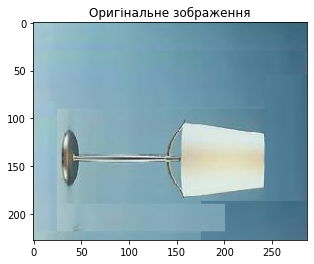

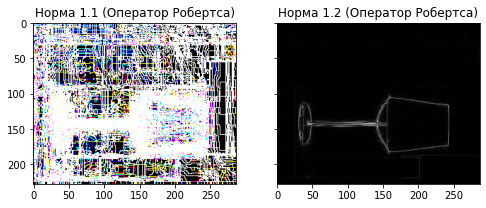

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


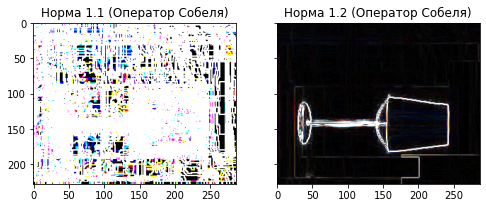

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


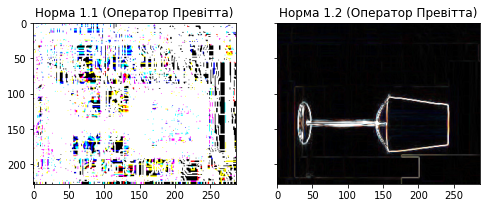

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


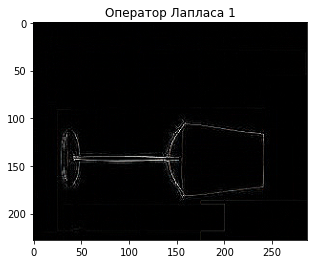

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


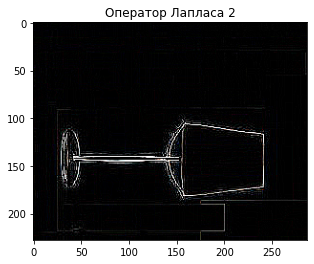

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


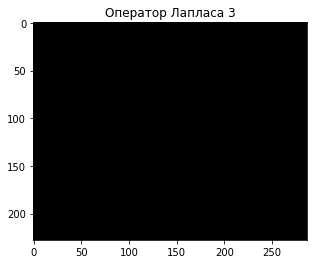

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


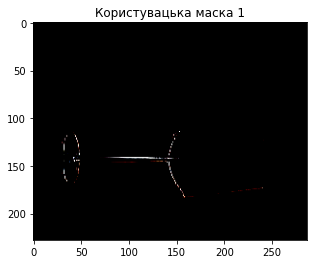

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


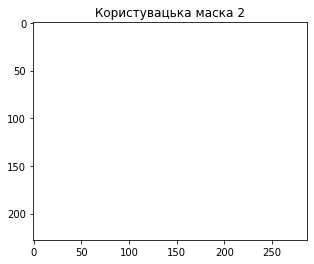

In [39]:
import numpy as np
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
import math
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

img = imread('/content/drive/My Drive/ColabNotebooks/lamp2.jpg')

# roberts
r1 = np.array([ [0, 0, 0], [0, 1, 0], [0, 0, -1] ])
r2 = np.array([ [0, 0, 0], [0, 0, -1], [0, 1, 0] ])
# sobel
s1 = np.array([ [1, 0, -1], [2, 0, -2], [1, 0, -1] ])
s2 = np.array([ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ])
# prewitt
p1 = np.array([ [1, 0, -1], [1, 0, -1], [1, 0, -1] ])
p2 = np.array([ [1, 1, 1], [0, 0, 0], [-1, -1, -1] ])
# laplace
l1 = np.array([ [0, -1, 0], [-1, 4, -1], [0, -1, 0] ])
l2 = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1] ])
l3 = np.array([ [-1, -2, -1], [-2, 4, -2], [-1, -2, -1] ])

# for 1 mask
def myEdge(mask, img, title):
  chn = []
  img = img.astype(np.int16)
  for ch in range(3):
    chn.append(convolve(img[:,:,ch], mask))
  img1 = np.dstack((chn[0], chn[1], chn[2]))
  plt.imshow(img1); plt.title(title)
  plt.show()

# for 2 mask operators
def myEdges(mask1, mask2, img, title):
  chn1, chn2 = [], []
  img = img.astype(np.int16)
  for ch in range(3):
    chn1.append(convolve(img[:,:,ch], mask1))
    chn2.append(convolve(img[:,:,ch], mask2))
  channelsN1, channelsN2 = [], []
  for i in range(len(chn1)):
    tmp1, tmp2 = [], []
    for j in range(len(chn1[i])):
      tmp12, tmp22 = [], []
      for k in range(len(chn1[i][j])):
        ch1, ch2 = chn1[i][j][k], chn2[i][j][k]
        tmp12.append(math.sqrt(ch1**2 + ch2**2))
        tmp22.append(max(abs(ch1), abs(ch2)))
      tmp1.append(tmp12); tmp2.append(tmp22)
    channelsN1.append(tmp1); channelsN2.append(tmp2)

  img1 = np.dstack((channelsN1[0], channelsN1[1], channelsN1[2]))
  img2 = np.dstack((channelsN2[0], channelsN2[1], channelsN2[2]))
  fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(8, 8))
  ax = ax.ravel()
  ax[0].imshow(img1); ax[0].set_title('Норма 1.1 (' + title + ')')
  ax[1].imshow(img2); ax[1].set_title('Норма 1.2 (' + title + ')')
  plt.show()

# show original image
plt.imshow(img)
plt.title('Оригінальне зображення')

myEdges(r1, r2, img, 'Оператор Робертса')
myEdges(s1, s2, img, 'Оператор Собеля')
myEdges(p1, p2, img, 'Оператор Превітта')
myEdge(l1, img, 'Оператор Лапласа 1')
myEdge(l2, img, 'Оператор Лапласа 2')
myEdge(l3, img, 'Оператор Лапласа 3')
myEdge(np.array([ [-1, -1, -1], [-1, 2, -3], [-1, 5, -1] ]), img, 'Користувацька маска 1')
myEdge(np.array([ [1, 0, 1], [-1, 2, -3], [-1, 5, 10] ]), img, 'Користувацька маска 2')